In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [2]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

train_data, val_data , train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.25,
                                                                     shuffle =True, random_state = 100)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 [==============================] - 0s 0us/step
6736
2246
2246
46


In [3]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, data in enumerate(data) :
    results[i,data] = 1
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
# [[YOUR CODE]]

y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [7]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]

model = keras.Sequential()
model.add(layers.Input(shape = (10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation ='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 10000)             40000     
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 46)                5

In [9]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]

check_point_cb = callbacks.ModelCheckpoint('keras_reuters_model.h5',save_best_only = True)
early_stopping_cb = callbacks.EarlyStopping(patience = 5, monitor = 'val_loss',
                                restore_best_weights = True)


model.compile(optimizer = 'adam',
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])

history = model.fit(x_train, y_train,
                    epochs = 100,
                    validation_data = (x_val, y_val),
                    callbacks = [check_point_cb, early_stopping_cb])

Epoch 1/100
211/211 [==============================] - 5s 15ms/step - loss: 1.3957 - accuracy: 0.6869 - val_loss: 1.0273 - val_accuracy: 0.7809
Epoch 2/100
  9/211 [>.............................] - ETA: 2s - loss: 0.5044 - accuracy: 0.8854

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


211/211 [==============================] - 6s 27ms/step - loss: 0.4689 - accuracy: 0.8919 - val_loss: 0.8702 - val_accuracy: 0.8237
Epoch 3/100
211/211 [==============================] - 4s 20ms/step - loss: 0.2473 - accuracy: 0.9430 - val_loss: 1.2150 - val_accuracy: 0.7979
Epoch 4/100
211/211 [==============================] - 6s 26ms/step - loss: 0.1831 - accuracy: 0.9532 - val_loss: 1.4614 - val_accuracy: 0.7809
Epoch 5/100
211/211 [==============================] - 5s 21ms/step - loss: 0.1641 - accuracy: 0.9577 - val_loss: 1.4916 - val_accuracy: 0.7783
Epoch 6/100
211/211 [==============================] - 3s 15ms/step - loss: 0.1540 - accuracy: 0.9586 - val_loss: 1.5908 - val_accuracy: 0.7703
Epoch 7/100
211/211 [==============================] - 3s 14ms/step - loss: 0.1414 - accuracy: 0.9605 - val_loss: 1.5421 - val_accuracy: 0.7747


<ipython-input-10-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


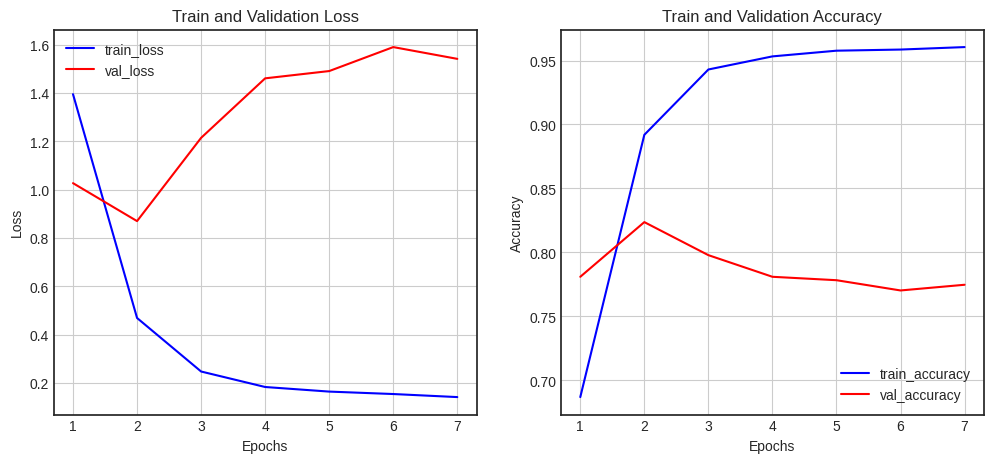

In [10]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [11]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9749 - accuracy: 0.7979


[0.9749284982681274, 0.7978628873825073]